The purpose of this notebook is to perform some exploratory data analysis on the 'All Pokemon' dataset. I will then move on to predict if a pokemon is legendary or final evolution using machine learning 

In [168]:
# Import the necessary packages 

import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.svm import LinearSVC
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import confusion_matrix, classification_report
%matplotlib inline

# Data Loading and Initial Exploration: Starting our Pokémon adventure!

### Let's get started by reading in the All Pokemon dataset and saving it the variable pokemon_df 

In [169]:
pokemon_df = pd.read_csv(r"C:\Users\SCOTT.HOPE\OneDrive - Zurich Insurance\Documents\BPP Apprenticeship\Data Science Professional Practice\Pokemon Project\All_Pokemon.csv")  # Reading in the All Pokemon dataset

We will start our exploration by looking at the top 5 and last 5 rows in the dataset 

In [170]:
pokemon_df.head()

,Number,Name,Type 1,Type 2,Abilities,HP,Att,Def,Spa,Spd,...,Against Bug,Against Rock,Against Ghost,Against Dragon,Against Dark,Against Steel,Against Fairy,Height,Weight,BMI
0,1,Bulbasaur,Grass,Poison,"['Chlorophyll', 'Overgrow']",45,49,49,65,65,...,1.0,1.0,1.0,1.0,1.0,1.0,0.5,0.7,6.9,14.1
1,2,Ivysaur,Grass,Poison,"['Chlorophyll', 'Overgrow']",60,62,63,80,80,...,1.0,1.0,1.0,1.0,1.0,1.0,0.5,1.0,13.0,13.0
2,3,Venusaur,Grass,Poison,"['Chlorophyll', 'Overgrow']",80,82,83,100,100,...,1.0,1.0,1.0,1.0,1.0,1.0,0.5,2.0,100.0,25.0
3,3,Mega Venusaur,Grass,Poison,['Thick Fat'],80,100,123,122,120,...,1.0,1.0,1.0,1.0,1.0,1.0,0.5,2.4,155.5,27.0
4,4,Charmander,Fire,NaN,"['Blaze', 'Solar Power']",39,52,43,60,50,...,0.5,2.0,1.0,1.0,1.0,0.5,0.5,0.6,8.5,23.6


In [171]:
pokemon_df.tail()

,Number,Name,Type 1,Type 2,Abilities,HP,Att,Def,Spa,Spd,...,Against Bug,Against Rock,Against Ghost,Against Dragon,Against Dark,Against Steel,Against Fairy,Height,Weight,BMI
1027,896,Glastrier,Ice,NaN,['Chilling Neigh'],100,145,130,65,110,...,1.0,2.0,1.0,1.0,1.0,2.0,1.0,2.2,800.0,165.3
1028,897,Spectrier,Ghost,NaN,['Grim Neigh'],100,65,60,145,80,...,0.5,1.0,2.0,1.0,2.0,1.0,1.0,2.0,44.5,11.1
1029,898,Calyrex,Psychic,Grass,['Unnerve'],100,80,80,80,80,...,4.0,1.0,2.0,1.0,2.0,1.0,1.0,1.1,7.7,6.4
1030,898,Calyrex Ice Rider,Psychic,Ice,['As One'],100,165,150,85,130,...,2.0,2.0,2.0,1.0,2.0,2.0,1.0,2.4,809.1,140.5
1031,898,Calyrex Shadow Rider,Psychic,Ghost,['As One'],100,85,80,165,100,...,1.0,1.0,4.0,1.0,4.0,1.0,1.0,2.4,53.6,9.3


In [172]:
pokemon_df.shape

(1032, 44)

We can see from the shape of the dataframe that we have 1032 rows and 44 columns. That's onix-pectedly a lot of information! 

# Data Cleaning and Preparation: Polishing our Pokémon data for battle!

In [173]:
pokemon_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1032 entries, 0 to 1031
Data columns (total 44 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Number                   1032 non-null   int64  
 1   Name                     1032 non-null   object 
 2   Type 1                   1032 non-null   object 
 3   Type 2                   548 non-null    object 
 4   Abilities                1032 non-null   object 
 5   HP                       1032 non-null   int64  
 6   Att                      1032 non-null   int64  
 7   Def                      1032 non-null   int64  
 8   Spa                      1032 non-null   int64  
 9   Spd                      1032 non-null   int64  
 10  Spe                      1032 non-null   int64  
 11  BST                      1032 non-null   int64  
 12  Mean                     1032 non-null   float64
 13  Standard Deviation       1032 non-null   float64
 14  Generation              

- We can see above that we 29 float column values, 10 integer values and 7 columns that are of an object type. 
- We can also see that we have Nan values in the `Type 2` column that we will need to deal with. You might even call them 'Ghost Type' values. The Pokemon puns continue...

Let's do a full check of null values, just to make sure 

In [174]:
pokemon_df.isnull().sum()

Number                       0
Name                         0
Type 1                       0
Type 2                     484
Abilities                    0
HP                           0
Att                          0
Def                          0
Spa                          0
Spd                          0
Spe                          0
BST                          0
Mean                         0
Standard Deviation           0
Generation                   0
Experience type              0
Experience to level 100      0
Final Evolution              0
Catch Rate                   0
Legendary                    0
Mega Evolution               0
Alolan Form                  0
Galarian Form                0
Against Normal               0
Against Fire                 0
Against Water                0
Against Electric             0
Against Grass                0
Against Ice                  0
Against Fighting             0
Against Poison               0
Against Ground               0
Against 

Excellent! We have confirmed that the only column with null values is the `Type 2` column. From my extensive experience as a Pokémon master, I know that some Pokémon do not have secondary types, so it makes sense for these values to be left blank. There are 484 rows with null values in this column, so we certainly don't want to drop those rows. Since `Type 2` is not a numerical column, using an average is not applicable. Therefore, it makes the most sense to fill these null values with `None`.

In [175]:
pokemon_df['Type 2'].fillna('None', inplace=True)  # Replacing null values in the Type 2 column with None 

C:\Users\SCOTT.HOPE\AppData\Local\Temp\ipykernel_26316\3063598039.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  pokemon_df['Type 2'].fillna('None', inplace=True)  # Replacing null values in the Type 2 column with None


We can also see from the `pokemon_df.info()` above that the `Generation` columns is showing as float type columns. I believe these should be whole numbers (int64) ranging between 1 and 8, so lets have a look as see if we can spot what is causing this. 

In [176]:
pokemon_df[pokemon_df['Generation'] % 1 != 0]

,Number,Name,Type 1,Type 2,Abilities,HP,Att,Def,Spa,Spd,...,Against Bug,Against Rock,Against Ghost,Against Dragon,Against Dark,Against Steel,Against Fairy,Height,Weight,BMI


By looking to see if any of the rows in the `Generation` column that are not divisible by 1 we have confirmed there are no decimals so we can go ahead and convert this column to `int` type 

In [177]:
pokemon_df['Generation'] = pokemon_df['Generation'].astype(int)

The `Final Evolution` column is also showing as a float type. This column should be a boolean column value indicating if a Pokemon has reached it's final evolution, indicating 1 for yes and 0 for no. However, I want to do something a little different with this column, so let's leave it until we look at feature engineering.  

The final step in our data cleaning process will be to remove the `Number` column. This dataset includes Pokémon's 'Mega' evolutions, as we can see in our pokemon_df.head() with Venusaur. Since Venusaur and Mega Venusaur are actually the same Pokémon, it creates a duplicate in the `Number` column, making it not a particularly useful index. An index was created when we read in the dataset, so we will use that one and drop the `Number` column.

In [178]:
pokemon_df.drop(columns='Number', axis=1, inplace=True)

In [179]:
pokemon_df.head()

,Name,Type 1,Type 2,Abilities,HP,Att,Def,Spa,Spd,Spe,...,Against Bug,Against Rock,Against Ghost,Against Dragon,Against Dark,Against Steel,Against Fairy,Height,Weight,BMI
0,Bulbasaur,Grass,Poison,"['Chlorophyll', 'Overgrow']",45,49,49,65,65,45,...,1.0,1.0,1.0,1.0,1.0,1.0,0.5,0.7,6.9,14.1
1,Ivysaur,Grass,Poison,"['Chlorophyll', 'Overgrow']",60,62,63,80,80,60,...,1.0,1.0,1.0,1.0,1.0,1.0,0.5,1.0,13.0,13.0
2,Venusaur,Grass,Poison,"['Chlorophyll', 'Overgrow']",80,82,83,100,100,80,...,1.0,1.0,1.0,1.0,1.0,1.0,0.5,2.0,100.0,25.0
3,Mega Venusaur,Grass,Poison,['Thick Fat'],80,100,123,122,120,80,...,1.0,1.0,1.0,1.0,1.0,1.0,0.5,2.4,155.5,27.0
4,Charmander,Fire,None,"['Blaze', 'Solar Power']",39,52,43,60,50,65,...,0.5,2.0,1.0,1.0,1.0,0.5,0.5,0.6,8.5,23.6


# Feature Engineering: Powering up our Pokémon data!

One of the most important skills for any great Pokémon trainer is mastering type matchups — knowing which types are strong or weak against others. The `Against_{}` columns in our dataset represent how effective each attacking type is against a specific Pokémon.

Since each Pokémon can have a unique combination of types, this results in a distinct profile of weaknesses and resistances. To determine which type combinations are the most vulnerable or the most resistant, we can calculate the product of all `Against_{}` values for each Pokémon.

- A higher product indicates greater overall vulnerability (more weaknesses).
- A lower product suggests stronger resistance (fewer weaknesses or more immunities).
This approach gives us a clear, data-driven way to identify the toughest and most fragile type combinations in the Pokémon world.

In [180]:
# Assuming pokemon_df is your DataFrame
types = pd.unique(pokemon_df['Type 1'])

# Identify 'Against' columns
columns_to_replace = ['Against {}'.format(i) for i in types]

# Replace 0 with 1 only in the 'Against' columns
pokemon_df[columns_to_replace] = pokemon_df[columns_to_replace].replace(0, 1)

# Select columns corresponding to 'Against {type}' and multiply them together
final_result = pokemon_df[columns_to_replace].prod(axis=1)

# Add the result as a new column to the DataFrame
pokemon_df['Vulnerability Score'] = final_result


In [181]:
pokemon_df.head()

,Name,Type 1,Type 2,Abilities,HP,Att,Def,Spa,Spd,Spe,...,Against Rock,Against Ghost,Against Dragon,Against Dark,Against Steel,Against Fairy,Height,Weight,BMI,Vulnerability Score
0,Bulbasaur,Grass,Poison,"['Chlorophyll', 'Overgrow']",45,49,49,65,65,45,...,1.0,1.0,1.0,1.0,1.0,0.5,0.7,6.9,14.1,0.250
1,Ivysaur,Grass,Poison,"['Chlorophyll', 'Overgrow']",60,62,63,80,80,60,...,1.0,1.0,1.0,1.0,1.0,0.5,1.0,13.0,13.0,0.250
2,Venusaur,Grass,Poison,"['Chlorophyll', 'Overgrow']",80,82,83,100,100,80,...,1.0,1.0,1.0,1.0,1.0,0.5,2.0,100.0,25.0,0.250
3,Mega Venusaur,Grass,Poison,['Thick Fat'],80,100,123,122,120,80,...,1.0,1.0,1.0,1.0,1.0,0.5,2.4,155.5,27.0,0.250
4,Charmander,Fire,None,"['Blaze', 'Solar Power']",39,52,43,60,50,65,...,2.0,1.0,1.0,1.0,0.5,0.5,0.6,8.5,23.6,0.125


To use this new `Vulnerability Score` column effectively we will have to create a new `Type` column to make visualisations and analysis more effective 

In [182]:
pokemon_df['Type'] =  pokemon_df.apply(lambda x: x['Type 1'] if pd.isnull(x['Type 2']) else f'{x["Type 1"]}_{x["Type 2"]}', axis=1)
pokemon_df.rename(columns = {'Type 1':'Primary Type', 'Type 2':'Secondary Type'}, inplace = True)

In [183]:
pokemon_df.head()

,Name,Primary Type,Secondary Type,Abilities,HP,Att,Def,Spa,Spd,Spe,...,Against Ghost,Against Dragon,Against Dark,Against Steel,Against Fairy,Height,Weight,BMI,Vulnerability Score,Type
0,Bulbasaur,Grass,Poison,"['Chlorophyll', 'Overgrow']",45,49,49,65,65,45,...,1.0,1.0,1.0,1.0,0.5,0.7,6.9,14.1,0.250,Grass_Poison
1,Ivysaur,Grass,Poison,"['Chlorophyll', 'Overgrow']",60,62,63,80,80,60,...,1.0,1.0,1.0,1.0,0.5,1.0,13.0,13.0,0.250,Grass_Poison
2,Venusaur,Grass,Poison,"['Chlorophyll', 'Overgrow']",80,82,83,100,100,80,...,1.0,1.0,1.0,1.0,0.5,2.0,100.0,25.0,0.250,Grass_Poison
3,Mega Venusaur,Grass,Poison,['Thick Fat'],80,100,123,122,120,80,...,1.0,1.0,1.0,1.0,0.5,2.4,155.5,27.0,0.250,Grass_Poison
4,Charmander,Fire,None,"['Blaze', 'Solar Power']",39,52,43,60,50,65,...,1.0,1.0,1.0,0.5,0.5,0.6,8.5,23.6,0.125,Fire_None


Now that we have engineering some features, lets have a look at how we can use these with some visualisations! 

# Data Analysis & Visualisations: Catching insights like a true Pokémon Master

I'm starting the analysis by looking at how the variables in the dataset relate to each other. To keep things clear, I’ll split the data and first look at how the Against{} columns correlate with one another, and then check the correlations among the rest of the variables

In [184]:
against = [col for col in pokemon_df.columns if 'against' in col.lower()]
others = [col for col in pokemon_df.columns if 'against' not in col.lower() and pd.api.types.is_numeric_dtype(pokemon_df[col])]

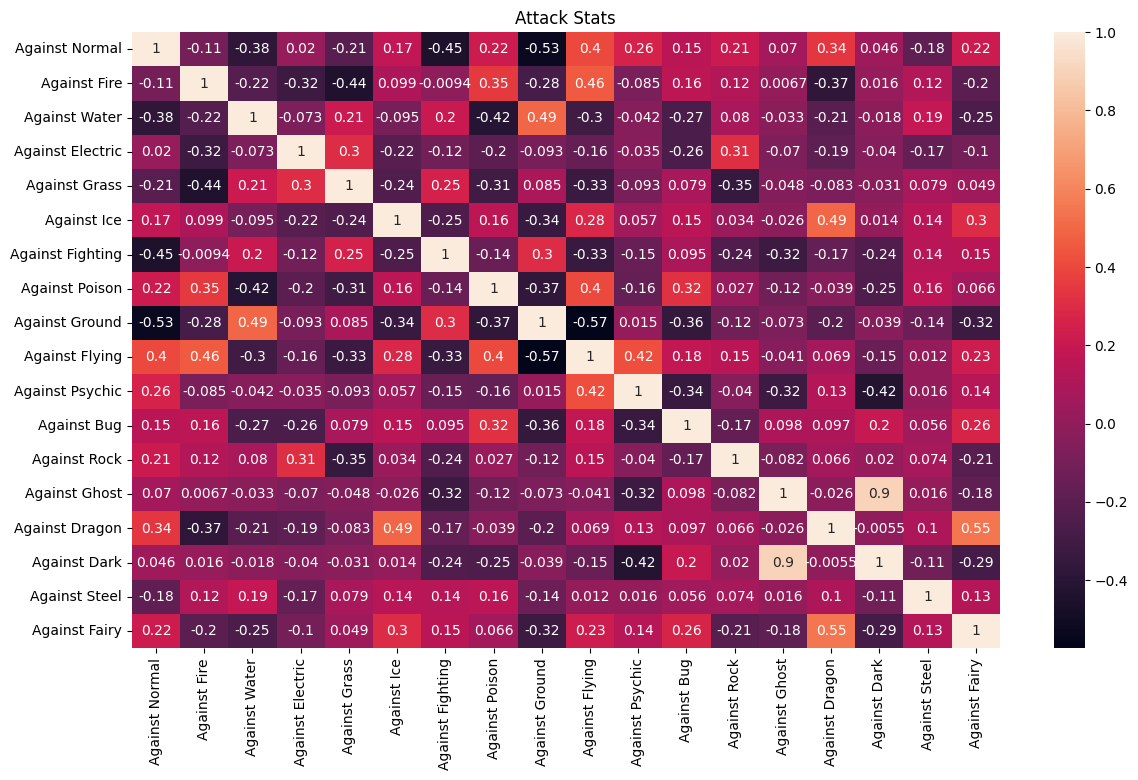

In [185]:
fig,axes = plt.subplots(figsize=(14,8))
sns.heatmap(pokemon_df[against].corr(),annot=True).set_title('Attack Stats')
plt.show()

- In the `Attck Stats` table, the strongest positive correlation appears between Fairy and Dragon-type Pokémon. This suggests that if a Pokémon is vulnerable to Fairy-type attacks, it's also likely to be vulnerable to Dragon-type attacks.
- There's also a strong negative correlation between Flying and Ground types. This aligns with type effectiveness logic—for instance, Electric-type moves are super effective against Flying types but have no effect on Ground types, which helps explain the inverse relationship.

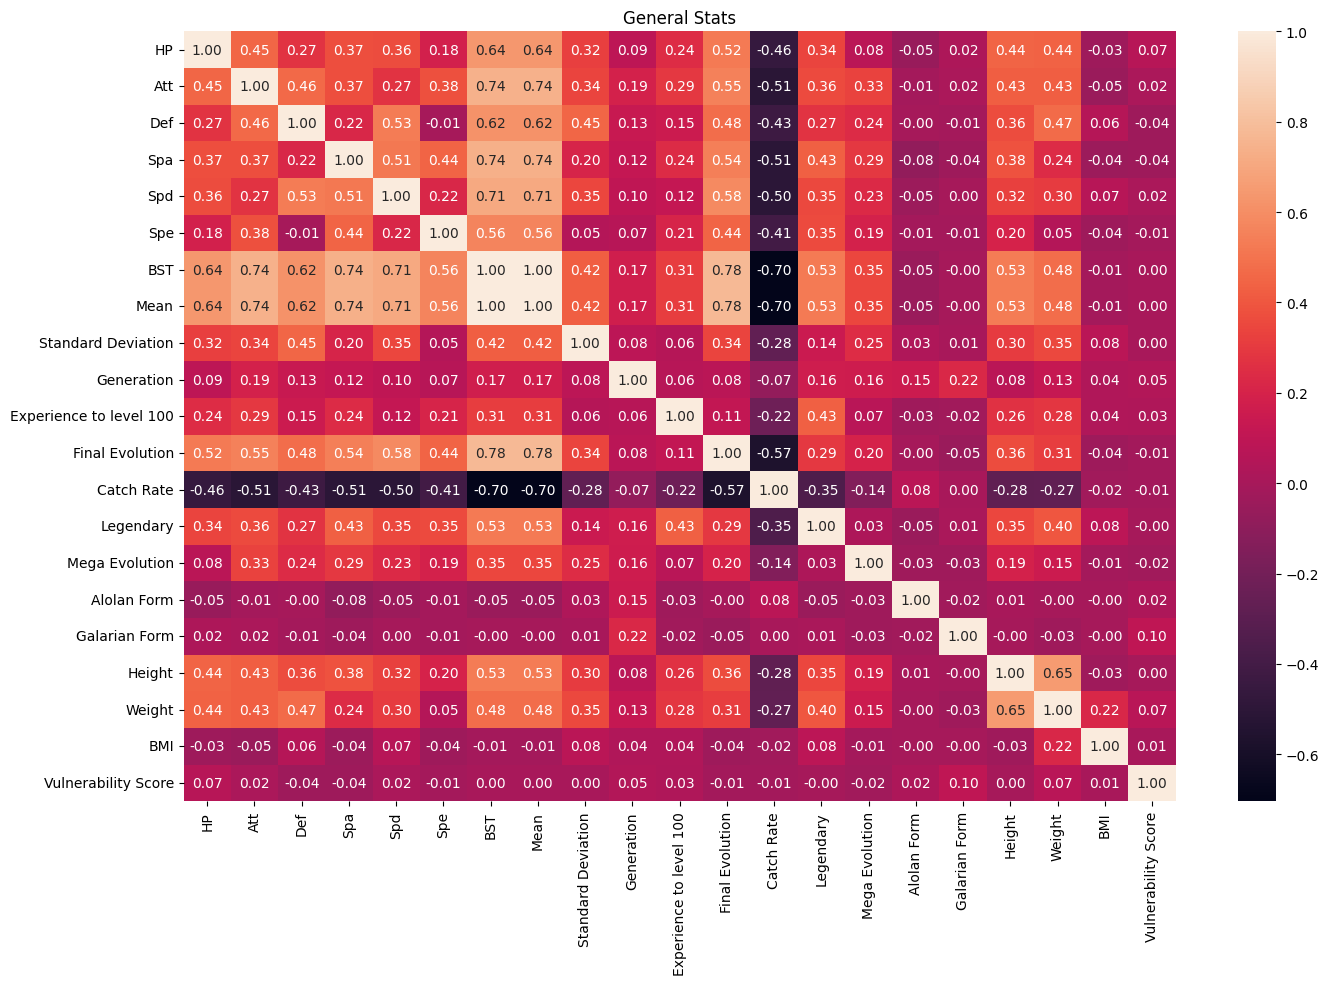

In [186]:
fig, axes = plt.subplots(figsize=(16, 10))
sns.heatmap(pokemon_df[others].corr(), annot=True, fmt=".2f").set_title('General Stats')
plt.show()

- The General Stats table reveals a strong correlation between `BST` (the sum of all base stats) and `Mean` (the average of all base stats) with whether a Pokémon is in its final evolved state. This makes sense because as a Pokémon evolves and becomes stronger, we would expect its base stats to increase.
- Examining the negative correlations, we find a strong inverse relationship between `BST` and `Mean` with the `Catch Rate`, indicating that as a Pokémon's strength increases, it becomes more challenging to catch.
- While there is a negative correlation between Catch Rate and Legendary Pokémon, it is perhaps a bit lower than one might expect. This suggests that there might be a chance after all!

Let's delve into Catch Rate in more detail. Understanding the Catch Rate provides us with a much better opportunity to catch them all, or at least be prepared for failure...

I will start by first of all looking at how Pokemon type affects the `Catch Rate`

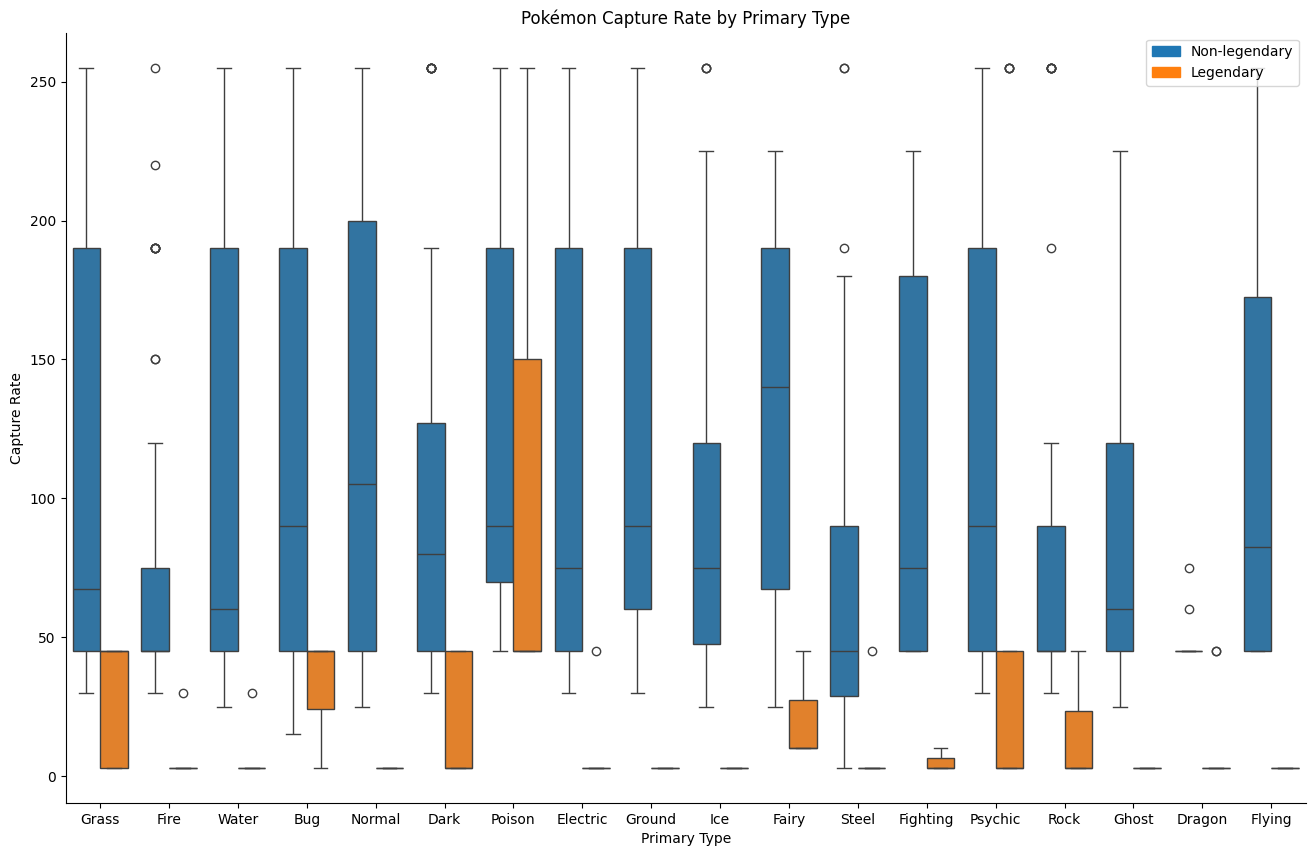

In [187]:
plt.figure(figsize=(16, 10))
ax = sns.boxplot(x='Primary Type', y='Catch Rate', hue='Legendary', data=pokemon_df)

# Set labels and title
ax.set(xlabel='Primary Type', ylabel='Capture Rate', title='Pokémon Capture Rate by Primary Type')

# Remove top and right spines
sns.despine(top=True, right=True)

# Create custom legend
legend_handles = [
    mpatches.Patch(color=sns.color_palette()[0], label='Non-legendary'),
    mpatches.Patch(color=sns.color_palette()[1], label='Legendary')
]
ax.legend(handles=legend_handles, loc='upper right', bbox_to_anchor=(1, 1))

plt.show()

- Looking at the above `Pokémon Capture Rate by Primary Type` box plot we can see that on average Fairy and Normal type pokemon are the easiest to catch whist Rock and Steel types are on average the most difficult to catch.
- When analysing the legendary type Pokemon we can cleary see that they are more difficult to capture than non-legendary time Pokemon. It looks like it maybe have been the Poison type legendary Pokemon that have skewed our results when looking at the `General Stats` correlation matrix 

I will now look to see if we can visualise the distribution per Primary type using a distribution plot to display the results 

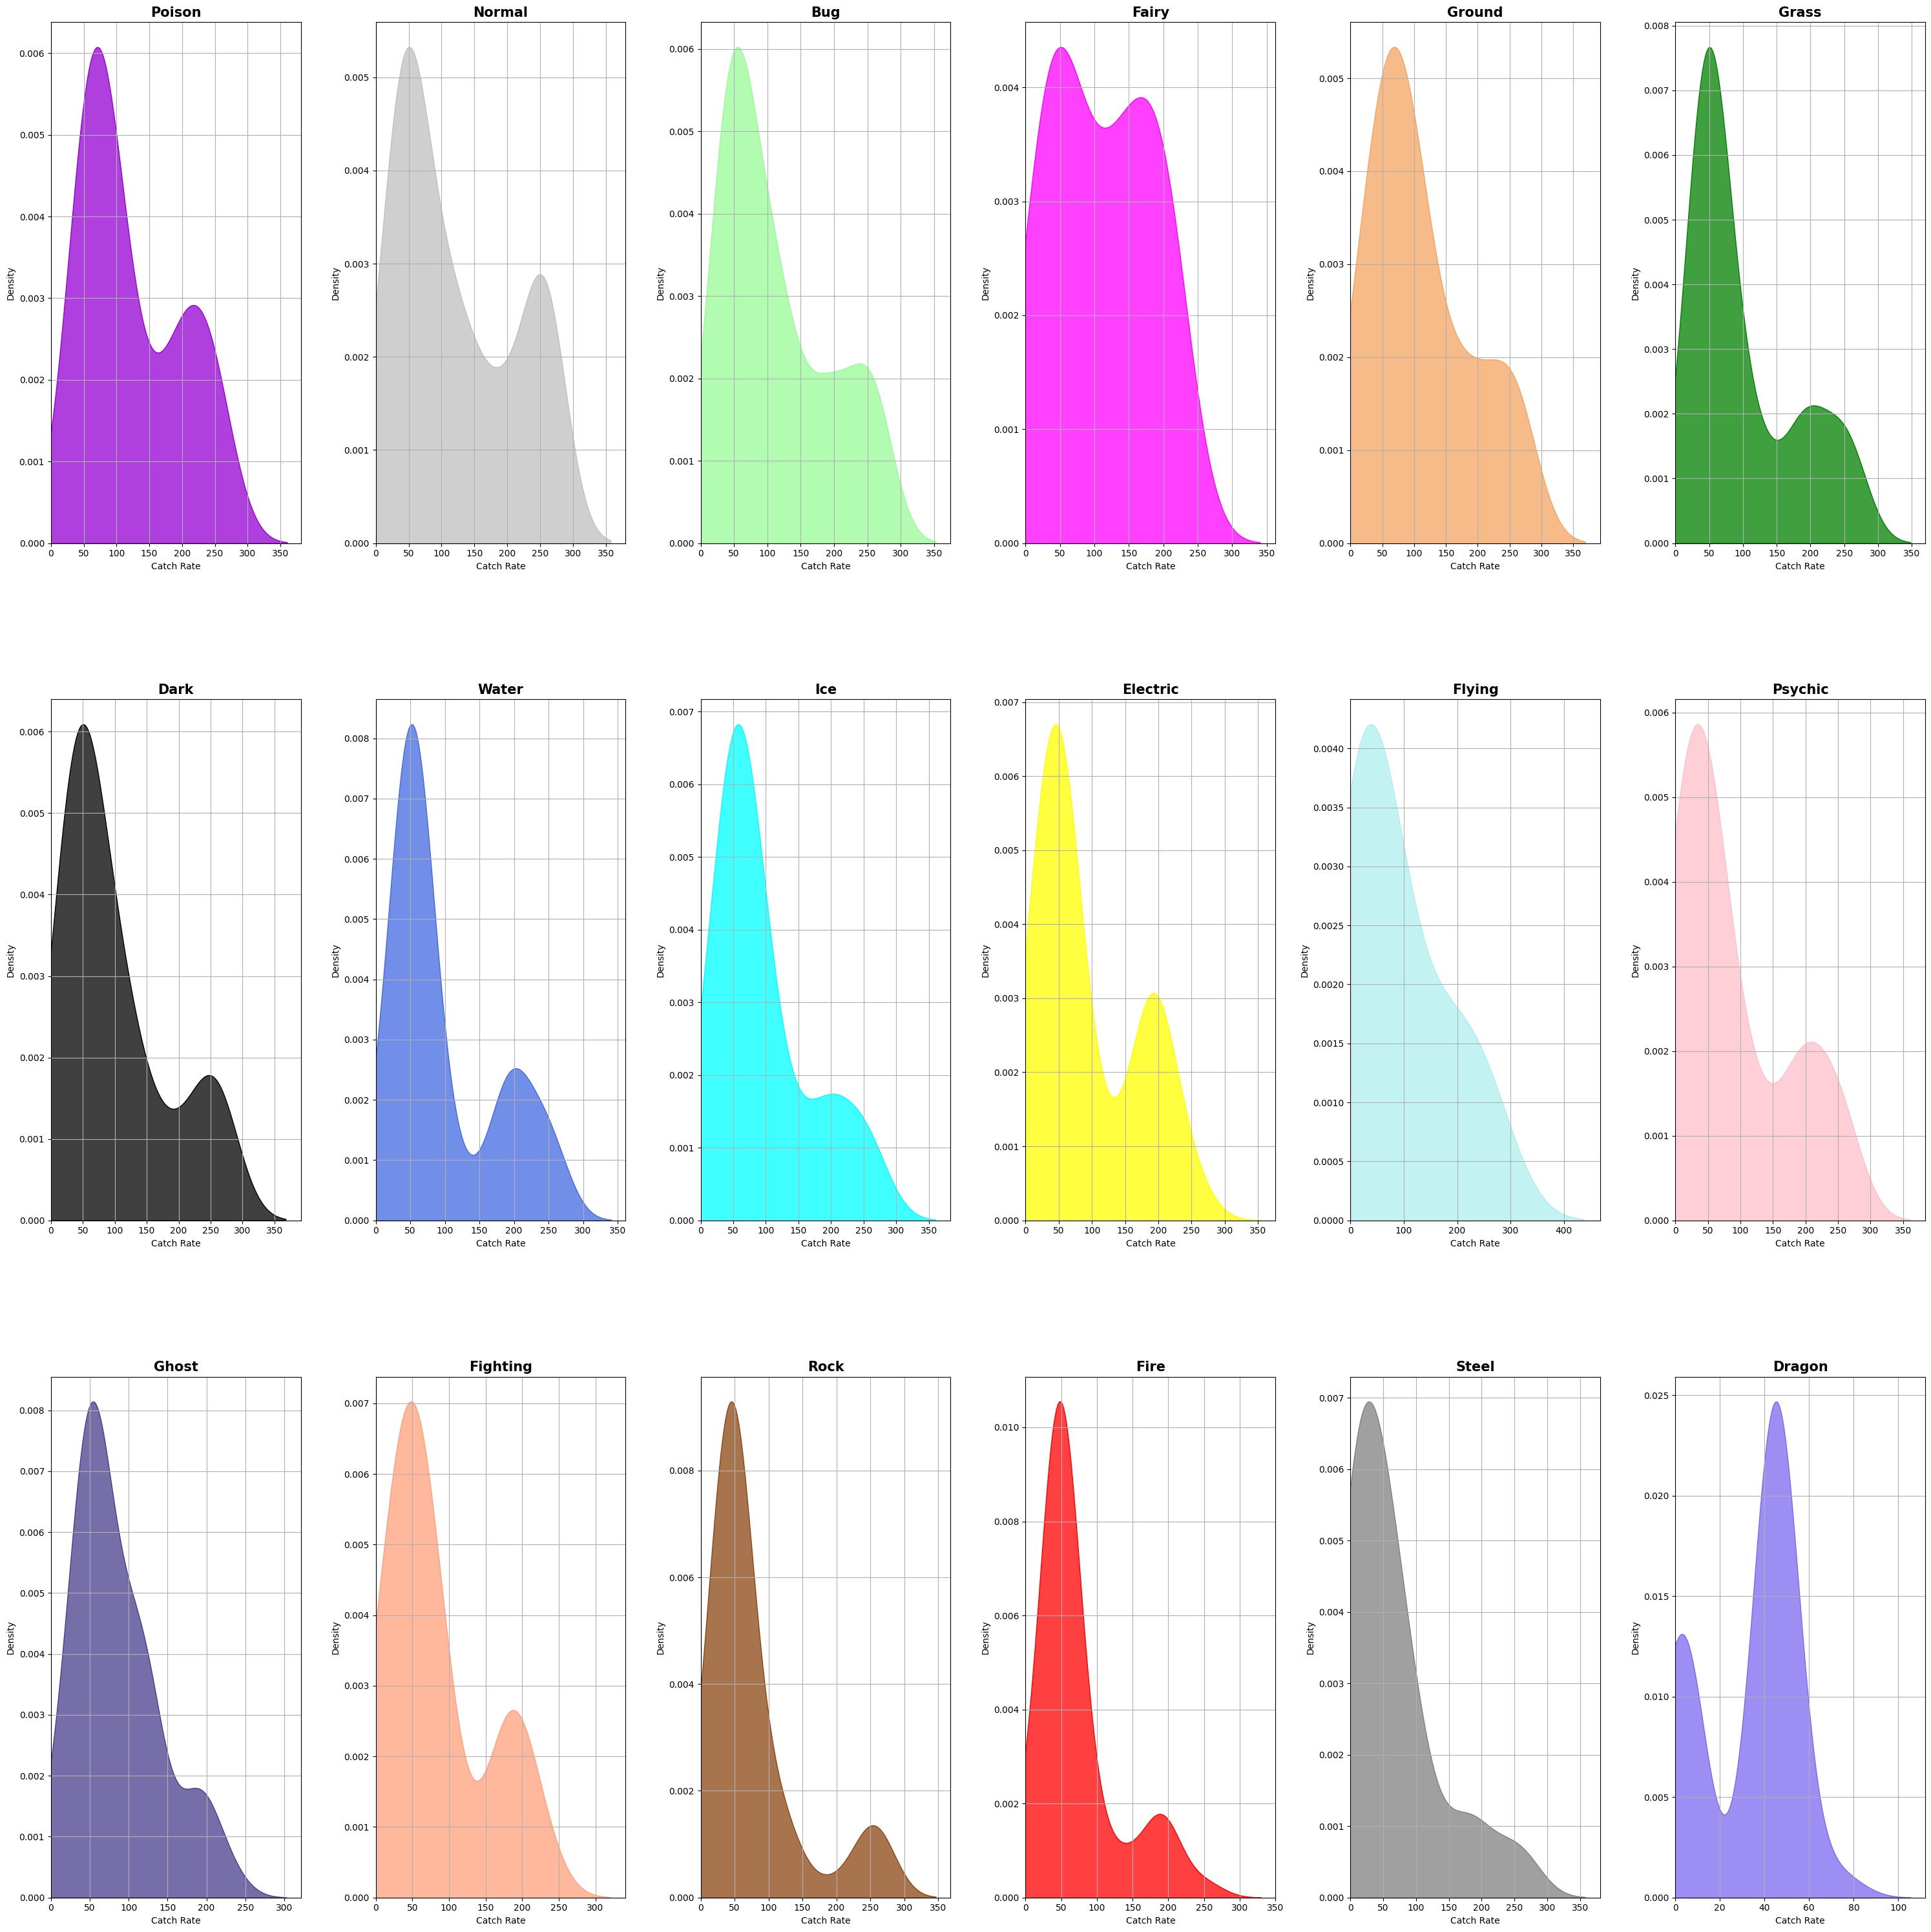

In [188]:
fig, ax = plt.subplots(nrows=3, ncols=6, figsize=(30, 30))
fig.patch.set_facecolor('white')
counter = 0
ncols = 6

colors = {'Fire':'red', 'Water':'royalblue', 'Grass':'green','Poison':'darkviolet','Steel':'grey','Bug':'palegreen','Normal':'silver','Dark':'k','Electric':'yellow','Ground':'sandybrown','Rock':'saddlebrown','Ice':'aqua','Fairy':'fuchsia','Fighting':'lightsalmon','Psychic':'pink','Ghost':'darkslateblue','Dragon':'mediumslateblue','Flying':'paleturquoise'}

# Sort the types by the mean catch rate for consistent plotting order
type_order = pokemon_df.groupby('Primary Type')['Catch Rate'].mean().sort_values(ascending=False).index

for i in type_order:
    j = counter % ncols
    k = (counter - j) // ncols

    type_df = pokemon_df[pokemon_df['Primary Type'] == i]['Catch Rate']

    sns.kdeplot(type_df, ax=ax[k, j], color=colors.get(i, 'blue'), fill=True, alpha=0.75)
    ax[k, j].set_title(i, fontweight='bold', fontsize=15)
    ax[k, j].set_xlim(left=0)  # Ensure the x-axis starts at zero
    ax[k, j].set_ylim(bottom=0)  # Ensure the y-axis starts at zero
    ax[k, j].set_xlabel('Catch Rate')
    ax[k, j].set_ylabel('Density')
    ax[k, j].grid(True)
    ax[k, j].set_facecolor('white')
    counter += 1

plt.tight_layout()
plt.subplots_adjust(wspace=0.3, hspace=0.3)

plt.show()
plt.close()

- We can see that a catch rate of roughly 50 is by far the most common which is why trying to catch them all is so difficult!
- Looking at Dragon and Steel we can also see that a large proportion actually have a `Catch Rate` of below 20. 

In [189]:
# Calculate the total count of Pokémon in each primary type
total_counts = pokemon_df.groupby('Primary Type').size().reset_index(name='Total Count')

# Filter the DataFrame for Pokémon with a catch rate below 20
filtered_df = pokemon_df[pokemon_df['Catch Rate'] < 20]

# Calculate the count of Pokémon with a catch rate below 20 in each primary type
below_20_counts = filtered_df.groupby('Primary Type').size().reset_index(name='Count Below 20')

# Merge the total counts and the counts below 20
merged_counts = pd.merge(total_counts, below_20_counts, on='Primary Type', how='left')

# Fill NaN values with 0 (in case there are types with no Pokémon below catch rate of 20)
merged_counts['Count Below 20'] = merged_counts['Count Below 20'].fillna(0)

# Calculate the percentage of Pokémon with a catch rate below 20
merged_counts['Percentage Below 20'] = (merged_counts['Count Below 20'] / merged_counts['Total Count']) * 100

# Display the table
print(merged_counts)

   Primary Type  Total Count  Count Below 20  Percentage Below 20
0           Bug           81             2.0             2.469136
1          Dark           46             3.0             6.521739
2        Dragon           42            14.0            33.333333
3      Electric           59             7.0            11.864407
4         Fairy           22             2.0             9.090909
5      Fighting           42             7.0            16.666667
6          Fire           64             5.0             7.812500
7        Flying            8             2.0            25.000000
8         Ghost           41             2.0             4.878049
9         Grass           91             2.0             2.197802
10       Ground           41             4.0             9.756098
11          Ice           38             3.0             7.894737
12       Normal          114             6.0             5.263158
13       Poison           40             0.0             0.000000
14      Ps

Now that we understand the `Catch Rate` in more detail. Lets take a look at which Pokemon types are worth sticking around for and maybe using that Master Ball...

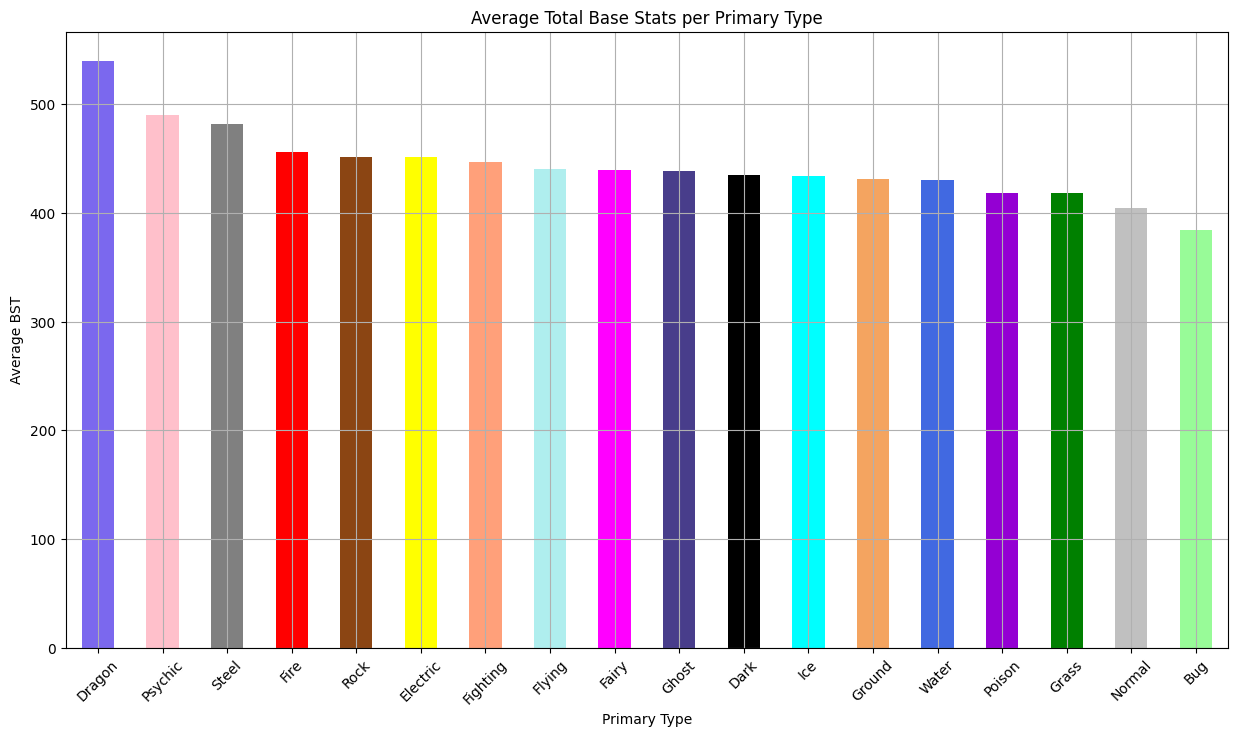

In [190]:
# Group by 'Primary Type' and calculate the average 'BST'
average_bst_per_type = pokemon_df.groupby('Primary Type')['BST'].mean().sort_values(ascending=False)

# Define colors for each Primary Type
colors = {'Fire': 'red', 'Water': 'royalblue', 'Grass': 'green', 'Poison': 'darkviolet', 
          'Steel': 'grey', 'Bug': 'palegreen', 'Normal': 'silver', 'Dark': 'k', 
          'Electric': 'yellow', 'Ground': 'sandybrown', 'Rock': 'saddlebrown', 
          'Ice': 'aqua', 'Fairy': 'fuchsia', 'Fighting': 'lightsalmon', 'Psychic': 'pink', 
          'Ghost': 'darkslateblue', 'Dragon': 'mediumslateblue', 'Flying': 'paleturquoise'}

# Get the colors for the Primary Types in the sorted order
bar_colors = [colors.get(type, 'blue') for type in average_bst_per_type.index]

# Plotting the bar chart
plt.figure(figsize=(15, 8))
average_bst_per_type.plot(kind='bar', color=bar_colors)
plt.title('Average Total Base Stats per Primary Type')
plt.xlabel('Primary Type')
plt.ylabel('Average BST')
plt.xticks(rotation=45)
plt.grid(True)
plt.show()

As we can see from the `Average Total Base Stats per Primary Type` bar chart above that on average Dragon type Pokemon have high Base Stats than others. So Although they are one of the more difficult types to catch, they are definetly worth sticking around for! 

Next, let's examine the average individual stats that contribute to the Total Base Stats in order to identify the strengths and weaknesses of different Pokémon Types. We'll achieve this by creating a radar chart for each type

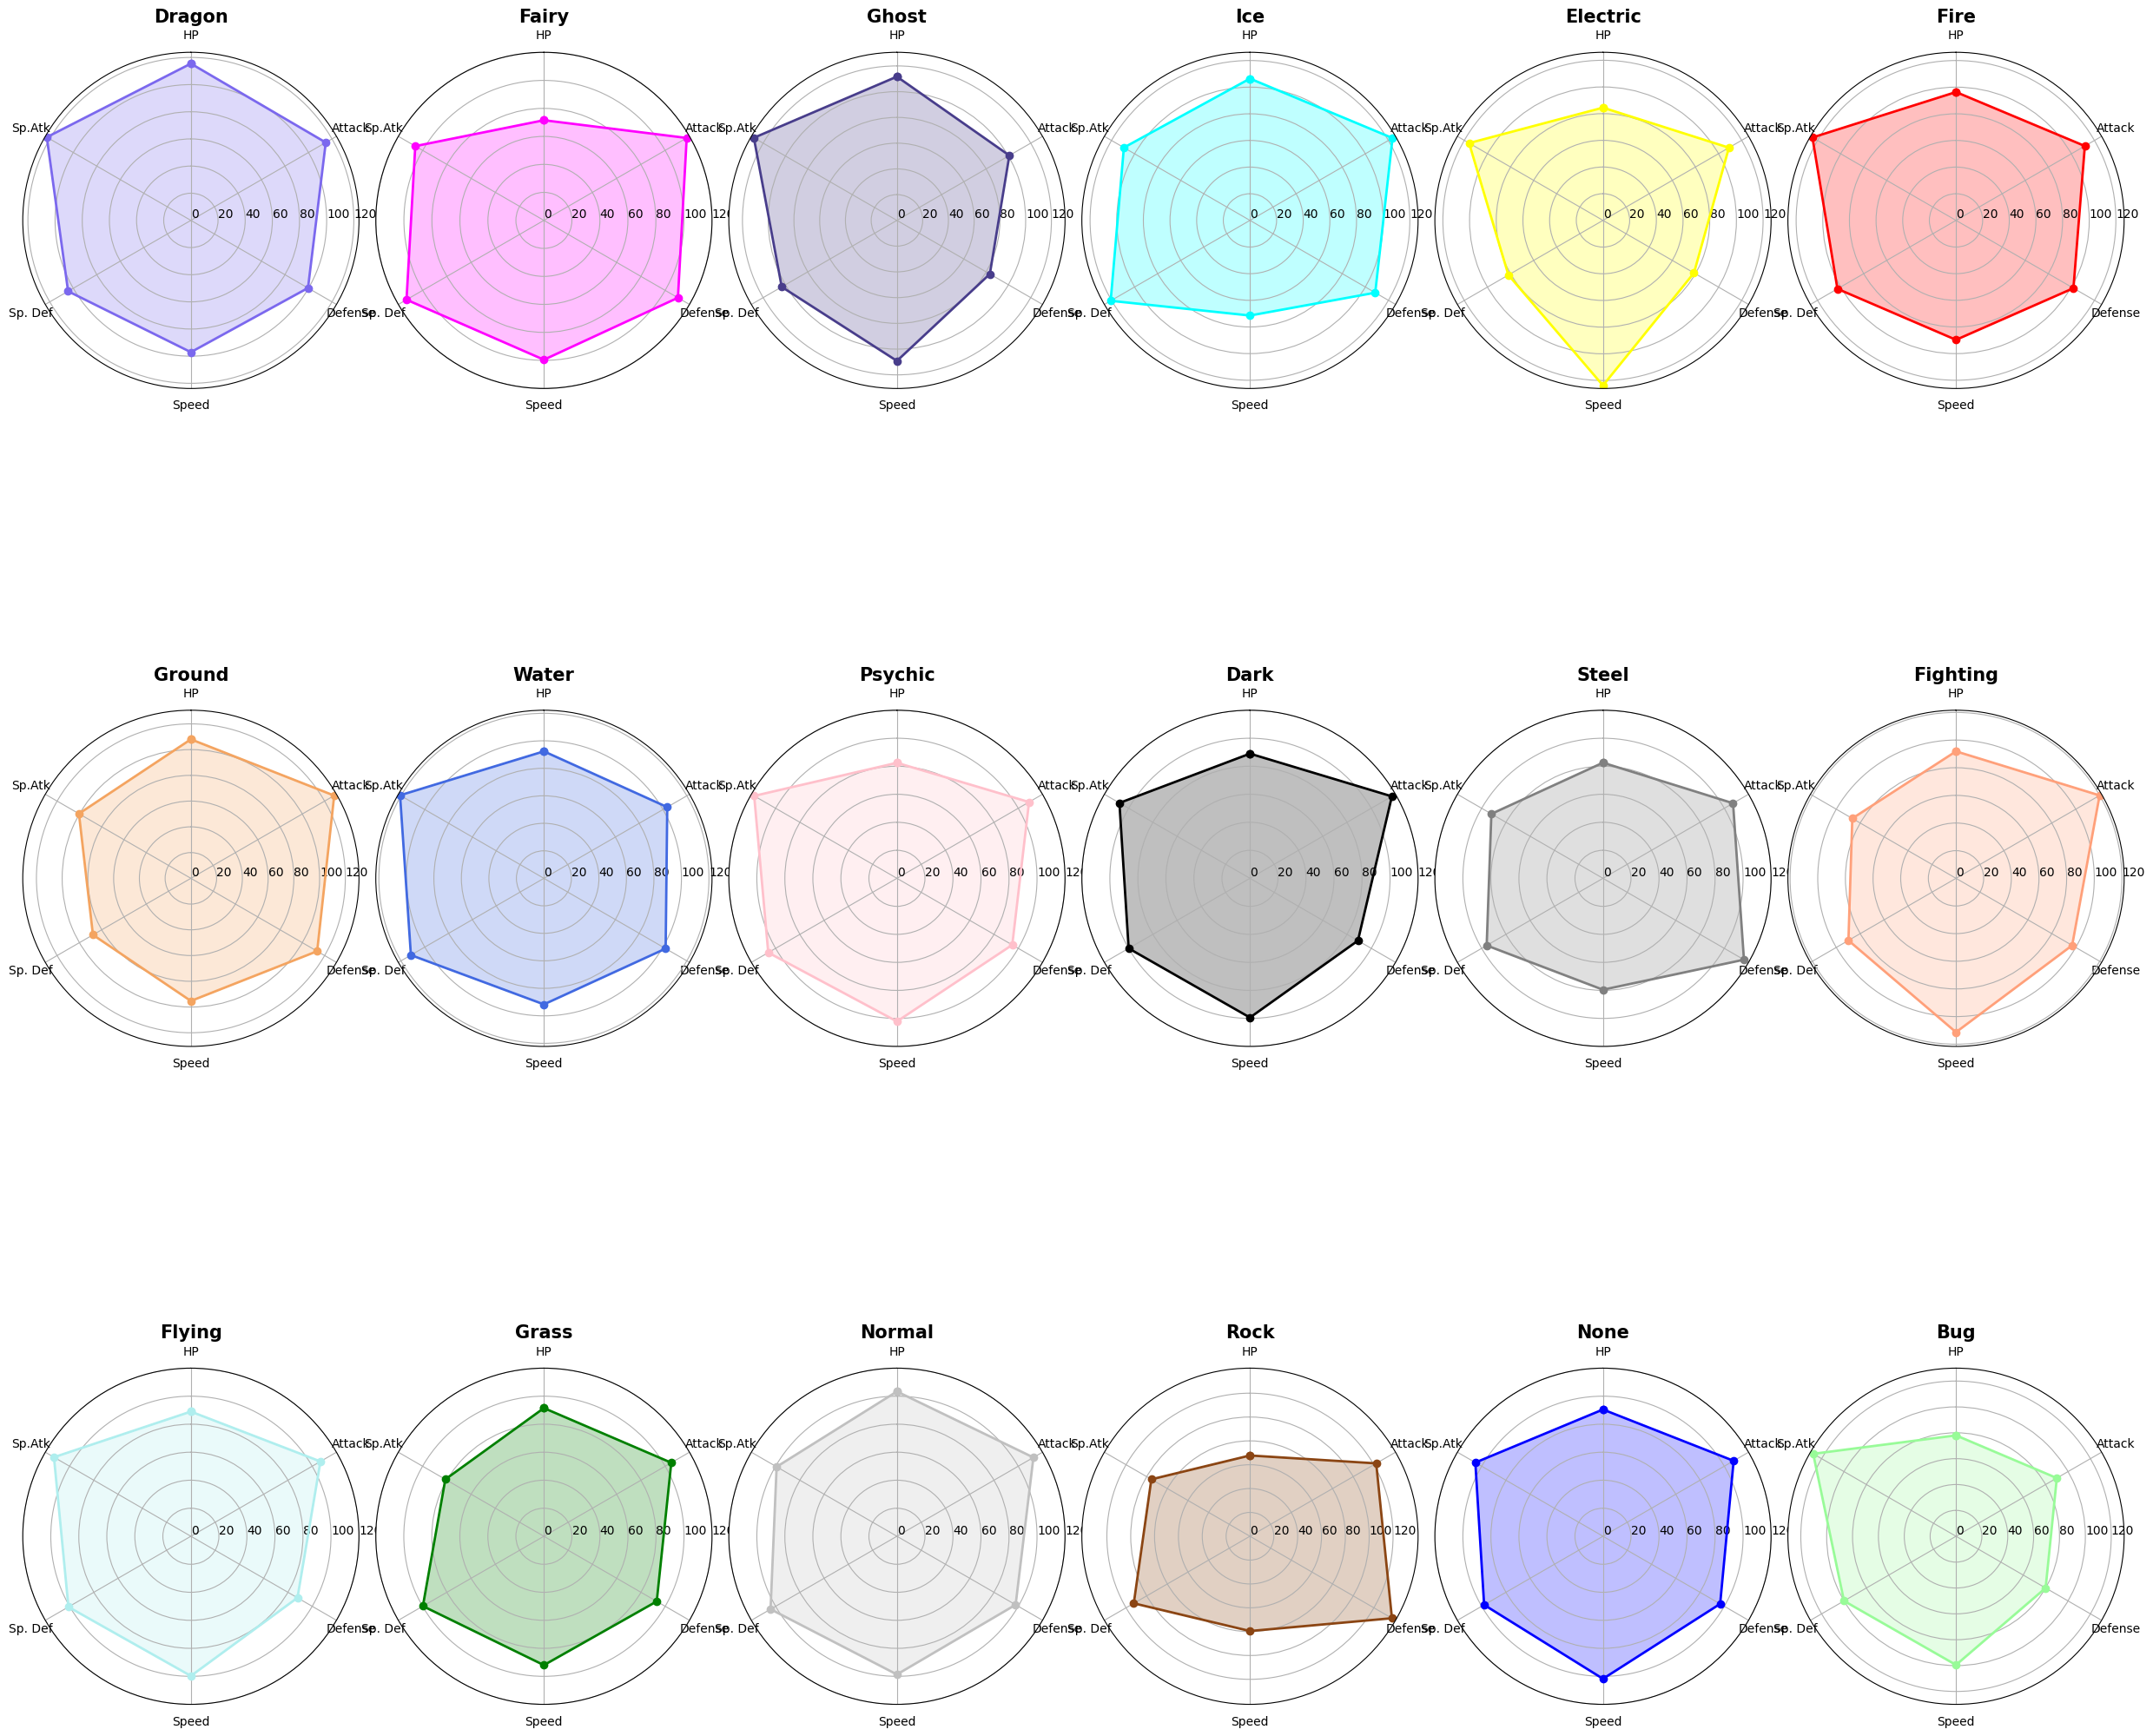

In [191]:
# Calculate the mean BST per Primary Type and Secondary Type
Ser1 = filtered_df.groupby('Primary Type')['BST'].mean() / 2.0
Ser2 = filtered_df.groupby('Secondary Type')['BST'].mean() / 2.0

# Combine the two series to get the mean BST per type
df_meanBST_type = pd.DataFrame(Ser1.add(Ser2, fill_value=0)).reset_index()
df_meanBST_type.columns = ['Type', 'Mean BST']
df_meanBST_type = df_meanBST_type.sort_values(by='Mean BST', ascending=False)

# Define labels and angles for the radar chart
labels = np.array(['HP', 'Sp.Atk', 'Sp. Def', 'Speed', 'Defense', 'Attack'])
angles = np.linspace(0, 2 * np.pi, len(labels), endpoint=False)
angles = np.concatenate((angles, [angles[0]]))

# Define colors for each Primary Type
colors = {
    'Fire': 'red', 'Water': 'royalblue', 'Grass': 'green', 'Poison': 'darkviolet',
    'Steel': 'grey', 'Bug': 'palegreen', 'Normal': 'silver', 'Dark': 'k',
    'Electric': 'yellow', 'Ground': 'sandybrown', 'Rock': 'saddlebrown',
    'Ice': 'aqua', 'Fairy': 'fuchsia', 'Fighting': 'lightsalmon', 'Psychic': 'pink',
    'Ghost': 'darkslateblue', 'Dragon': 'mediumslateblue', 'Flying': 'paleturquoise'
}

# Determine the number of rows needed for the subplots
num_types = len(df_meanBST_type)
ncols = 6
nrows = (num_types + ncols - 1) // ncols  # Calculate the number of rows needed

# Create subplots
fig, ax = plt.subplots(subplot_kw={'projection': 'polar'}, nrows=nrows, ncols=ncols, figsize=(25, 25))
fig.patch.set_facecolor('white')

# Function to create radar chart for a specific type
def create_radar_chart(type_name, ax, angles, labels, colors, filtered_df):
    type_df = filtered_df[
        (filtered_df['Primary Type'] == type_name) | 
        (filtered_df['Secondary Type'] == type_name)
    ][['HP', 'Att', 'Def', 'Spa', 'Spd', 'Spe']]
    
    type_mean_df = type_df.mean(axis=0)
    stats = [type_mean_df['HP'], type_mean_df['Spa'], type_mean_df['Spd'], type_mean_df['Spe'], type_mean_df['Def'], type_mean_df['Att']]
    stats = np.concatenate((stats, [stats[0]]))

    ax.set_theta_zero_location("N")
    ax.plot(angles, stats, 'o-', linewidth=2, color=colors.get(type_name, 'blue'))
    ax.fill(angles, stats, alpha=0.25, color=colors.get(type_name, 'blue'))
    ax.set_rticks([0, 20, 40, 60, 80, 100, 120])
    ax.set_rlabel_position(-90.0)
    ax.set_thetagrids((angles * 180 / np.pi)[:6], labels)
    ax.set_title(type_name, fontweight='bold', fontsize=15)
    ax.grid(True)
    ax.set_facecolor('white')

# Iterate over types and create radar charts
for counter, type_name in enumerate(df_meanBST_type['Type']):
    j = counter % ncols
    k = counter // ncols
    create_radar_chart(type_name, ax[k, j], angles, labels, colors, filtered_df)

# Hide empty subplots if any
for idx in range(counter + 1, nrows * ncols):
    fig.delaxes(ax.flat[idx])

plt.tight_layout()
plt.subplots_adjust(wspace=0.05)
plt.show()
plt.close()
 
    

The radar charts reveal several important insights:

- Dragon-type Pokémon are the strongest overall, with no significant weaknesses in any specific area.
- Steel and Rock-type Pokémon exhibit high defense but sacrifice speed as a result.
- Flying and Electic type Pokémon will typically be the quickest 
- Fighting-type Pokémon generally have excellent Attack stats, but their Special Attack (non-physical attacks) is relatively weak, making them less effective against Electric-type Pokémon that often cause paralysis through physical contact.
- Bug-type Pokémon have the lowest average stats across all categories.

These findings highlight the importance of having a balanced team of six Pokémon before heading into a battle!

Now, let's explore how certain attributes influence others. We'll begin by examining the impact of height and weight on a Pokémon's performance in various areas.

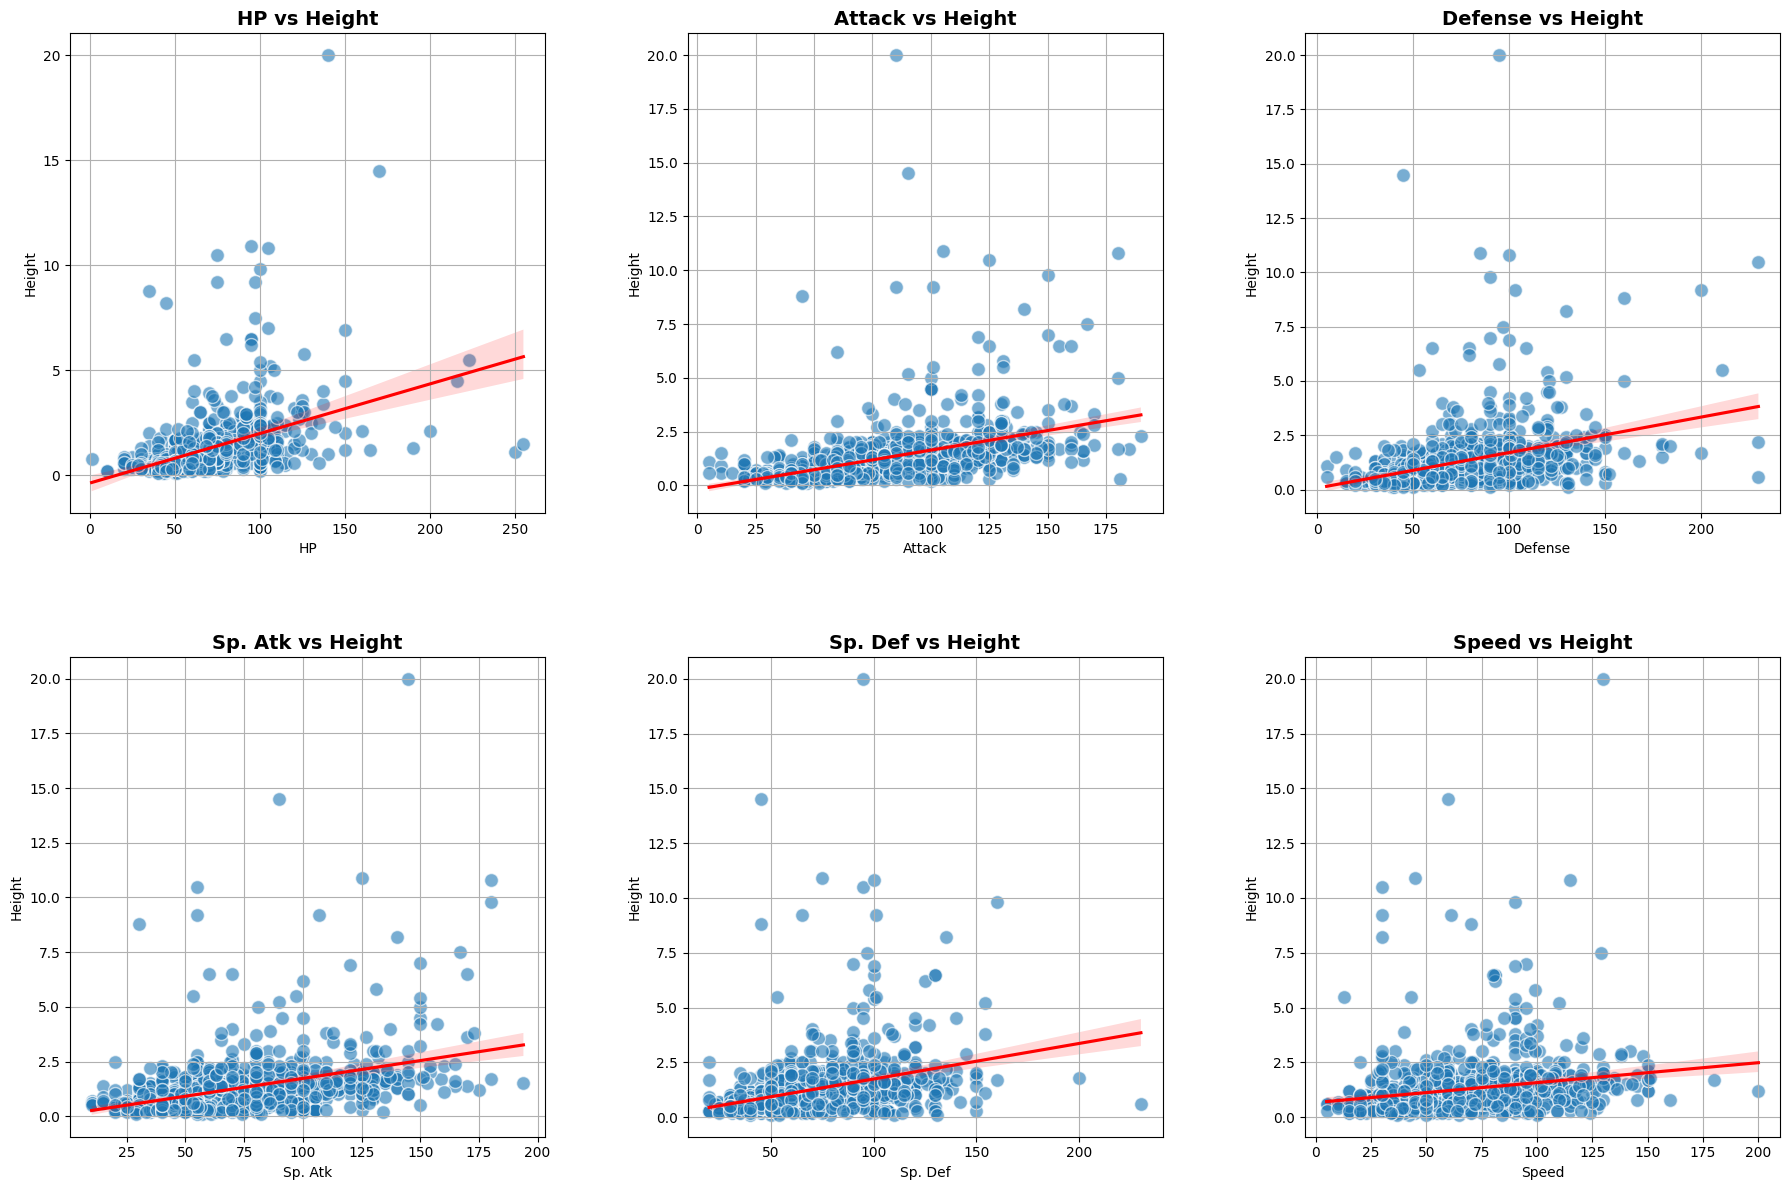

In [192]:
# Define the variables to be plotted against height
variables = ['HP', 'Att', 'Def', 'Spa', 'Spd', 'Spe']

# Define the custom labels
labels = np.array(['HP', 'Attack', 'Defense', 'Sp. Atk', 'Sp. Def', 'Speed'])

# Create a mapping from variables to labels
variable_to_label = dict(zip(variables, labels))

# Create subplots
fig, axs = plt.subplots(nrows=2, ncols=3, figsize=(18, 12))
fig.patch.set_facecolor('white')
axs = axs.flatten()

# Plot each variable against height with a trend line
for i, variable in enumerate(variables):
    sns.regplot(x=pokemon_df[variable], y=pokemon_df['Height'], ax=axs[i], scatter_kws={'alpha':0.6, 's':100, 'edgecolor':'w'}, line_kws={'color':'red'})
    axs[i].set_title(f'{variable_to_label[variable]} vs Height', fontweight='bold', fontsize=14)
    axs[i].set_xlabel(variable_to_label[variable])
    axs[i].set_ylabel('Height')
    axs[i].grid(True)

plt.tight_layout()
plt.subplots_adjust(wspace=0.3, hspace=0.3)
plt.show()
plt.close()


From the scatterplot, we can derive several key insights:

- There appears to be a correlation between height and the above statistics. For example, as a Pokémon grows in height, it tends to become quicker. This aligns with expectations, as Pokémon typically grow in size and see an increase in their stats when they evolve. This observation also confirms what we saw in the General Stats correlation table earlier.
- Among all the stats we examined, height shows the strongest correlation with HP. The regression line visually represents this relationship.
- The vast majority of Pokémon are under 2.5 meters in height.

Now that we've had a look at height, lets have a look at how weight impacts the same stats

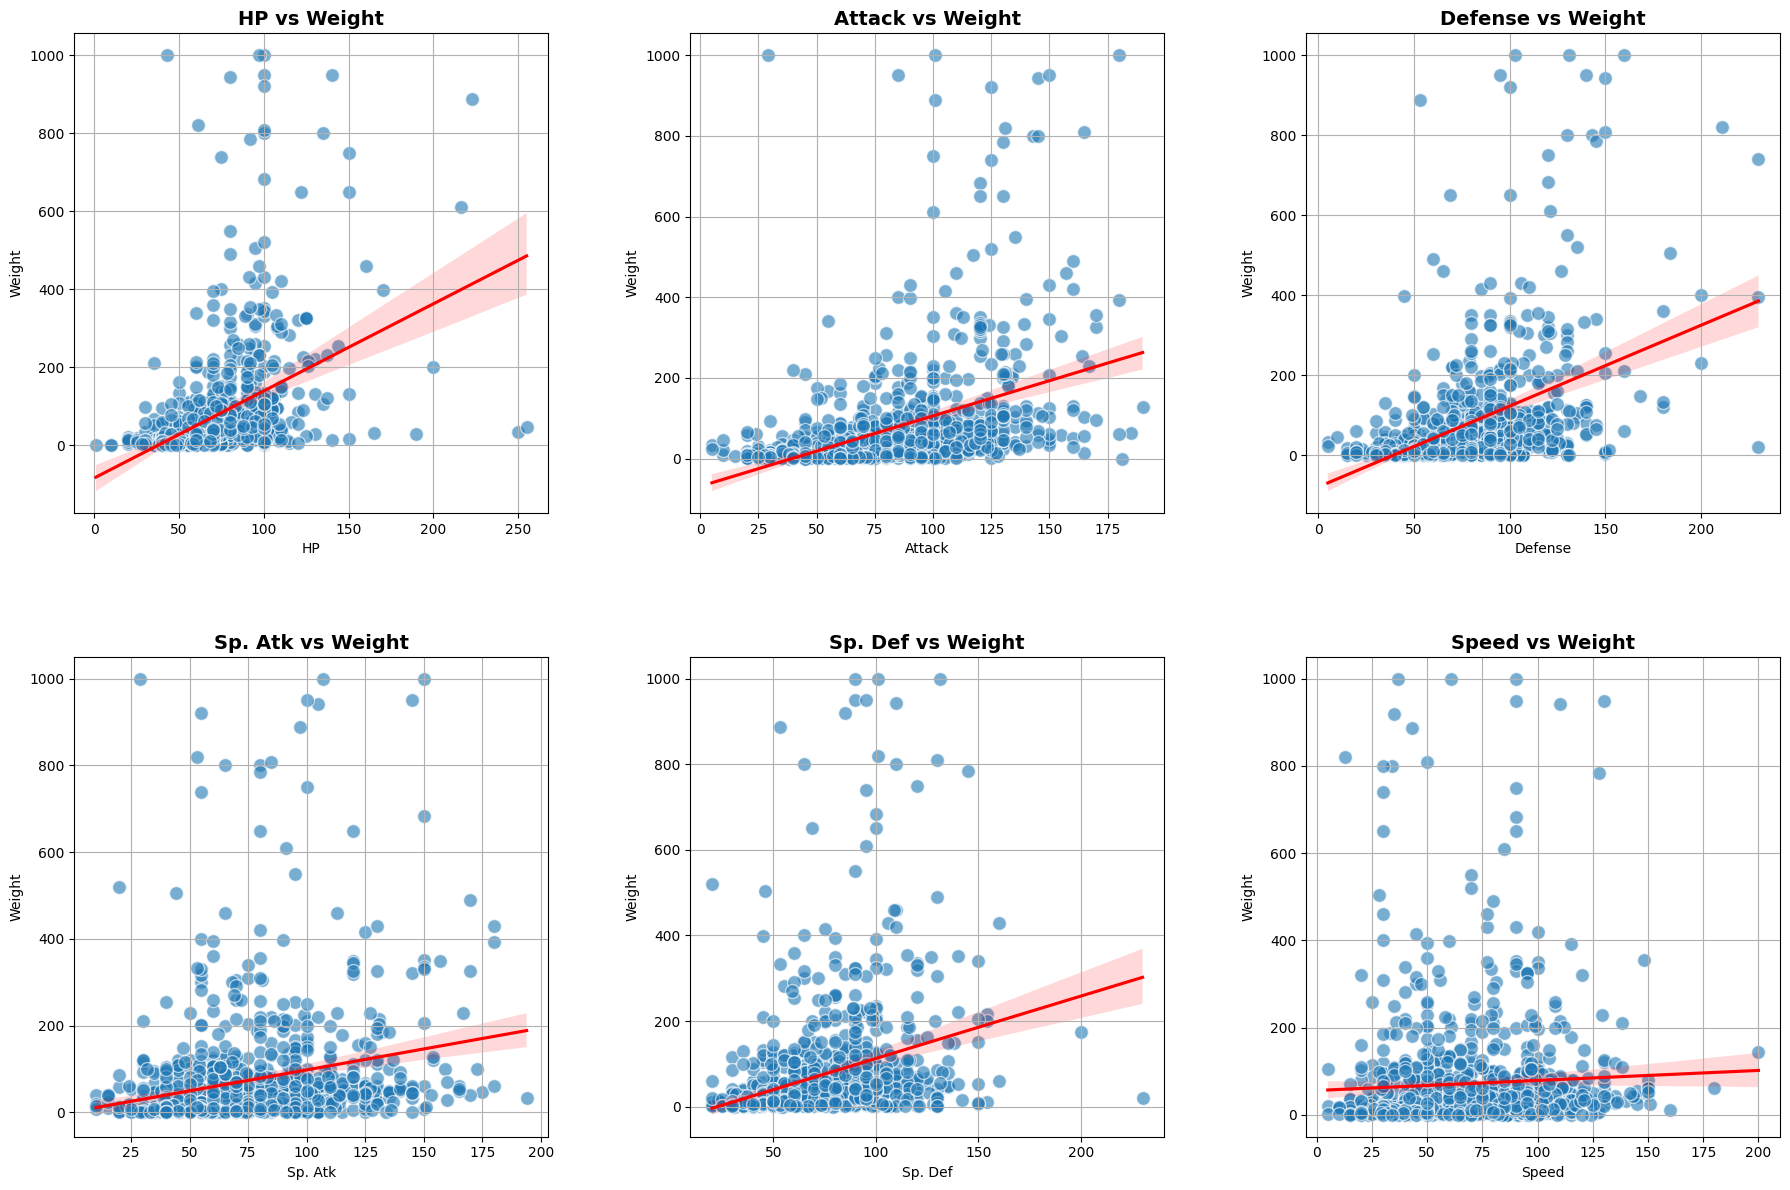

In [193]:
# Define the variables to be plotted against height
variables = ['HP', 'Att', 'Def', 'Spa', 'Spd', 'Spe']

# Define the custom labels
labels = np.array(['HP', 'Attack', 'Defense', 'Sp. Atk', 'Sp. Def', 'Speed'])

# Create a mapping from variables to labels
variable_to_label = dict(zip(variables, labels))

# Create subplots
fig, axs = plt.subplots(nrows=2, ncols=3, figsize=(18, 12))
fig.patch.set_facecolor('white')
axs = axs.flatten()

# Plot each variable against height with a trend line
for i, variable in enumerate(variables):
    sns.regplot(x=pokemon_df[variable], y=pokemon_df['Weight'], ax=axs[i], scatter_kws={'alpha':0.6, 's':100, 'edgecolor':'w'}, line_kws={'color':'red'})
    axs[i].set_title(f'{variable_to_label[variable]} vs Weight', fontweight='bold', fontsize=14)
    axs[i].set_xlabel(variable_to_label[variable])
    axs[i].set_ylabel('Weight')
    axs[i].grid(True)

plt.tight_layout()
plt.subplots_adjust(wspace=0.3, hspace=0.3)
plt.show()
plt.close()

From our `Weight` scatterplot, we can derive several key insights:
- Weight appears to have a more significant impact on a Pokémon's stats compared to height.
- `HP` shows the strongest correlation with a Pokémon's weight, reinforcing what we observed in the `General Stats` correlation table.
- Unlike `Height`, `Weight` seems to influence other stats to a greater extent as well.
- The exception is `Speed`, which shows a flatter regression line, indicating that as weight increases, speed only experiences a slight increase.

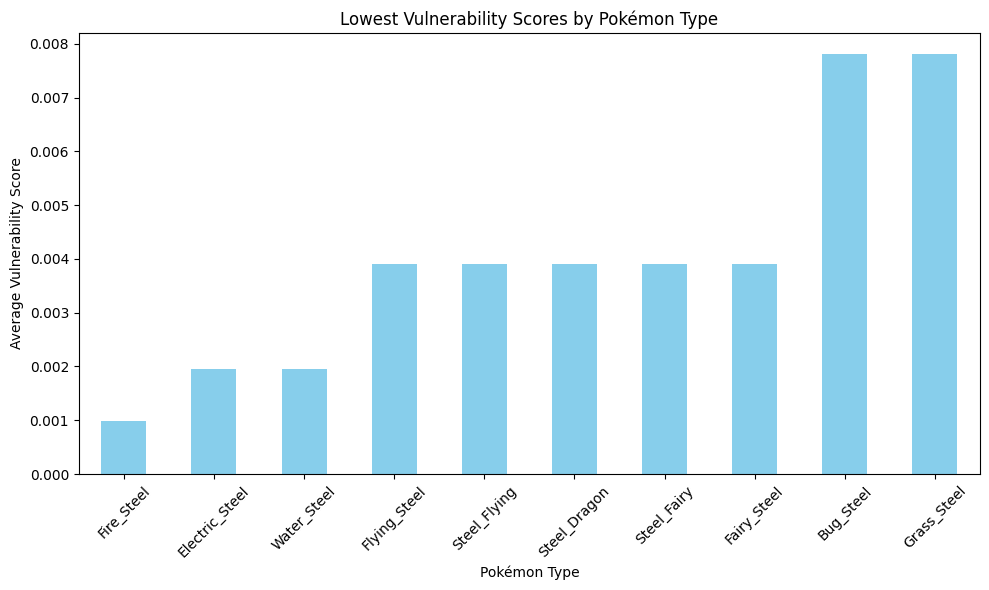

In [194]:
# Calculate the average vulnerability score by type
average_vulnerability = pokemon_df.groupby('Type')['Vulnerability Score'].mean()

# Sort the average vulnerability scores in ascending order
sorted_vulnerability = average_vulnerability.sort_values()

# Select the lowest 10 average vulnerability scores
lowest_10_vulnerability = sorted_vulnerability.head(10)

# Plotting the bar chart
plt.figure(figsize=(10, 6))
lowest_10_vulnerability.plot(kind='bar', color='skyblue')
plt.title('Lowest Vulnerability Scores by Pokémon Type')
plt.xlabel('Pokémon Type')
plt.ylabel('Average Vulnerability Score')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

With some exciting data exploration and visualization complete, it's time to evolve to the next level – machine learning!

# Unveiling the Ultimate Machine Learning Scheme

I will now explore how to use machine learning to predict if a Pokémon is legendary or not.
What’s the use case, you say? I'm glad you asked.

Throughout this notebook, I’ve been masquerading as a Pokémon master, but in reality…

I AM A MEMBER OF TEAM ROCKET! And I am using my data science skills for nefarious purposes, aiming to steal all of the best Pokémon for myself! However, one thing about us Team Rocket grunts is that we're not known for carrying around Pokédexes. So, when I steal a Pokémon, I have no idea whether it is legendary or not. This is where machine learning comes in. I hope to use machine learning to analyse a Pokémon's stats and determine whether it is legendary or not.

As I lay the groundwork for my scheme to conquer the Pokémon world, I will harness the power of a RandomForestClassifier. Armed with labels that reveal whether a Pokémon is legendary, this mission will be tackled as a supervised classification task. The RandomForestClassifier is my weapon of choice, renowned for its powers in managing imbalanced datasets, which is crucial given how rare legendary Pokémon are. Through my meticulous analysis, I have discovered that Legendary Pokémon typically have low catch rates and boast impressive stats. These attributes will be the cornerstone of my devious model.

              precision    recall  f1-score   support

         0.0       0.98      1.00      0.99       275
         1.0       1.00      0.86      0.92        35

    accuracy                           0.98       310
   macro avg       0.99      0.93      0.96       310
weighted avg       0.98      0.98      0.98       310



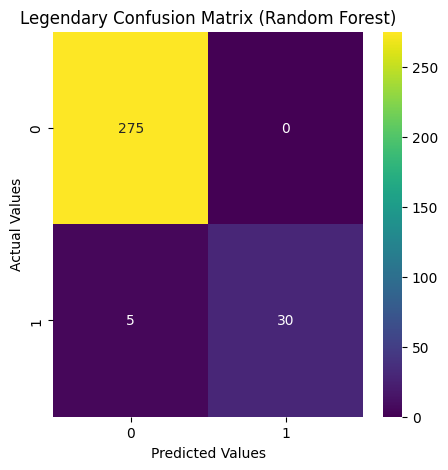

In [195]:
# Splitting the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=32)

# Training the RandomForestClassifier
clf_rf = RandomForestClassifier(random_state=0)
clf_rf.fit(X_train, y_train)

# Making predictions
y_pred_rf = clf_rf.predict(X_test)

# Printing the classification report
print(classification_report(y_test, y_pred_rf))

# Generating the confusion matrix
cm_rf = confusion_matrix(y_test, y_pred_rf)

# Plotting the confusion matrix
fig, ax = plt.subplots(figsize=(5, 5))
sns.heatmap(cm_rf, annot=True, cmap='viridis', fmt='g')
ax.set_ylabel('Actual Values')
ax.set_xlabel('Predicted Values')
ax.set_title('Legendary Confusion Matrix (Random Forest)')
plt.show()
plt.close()

The results of my RandomForestClassifier are quite promising in my grand scheme to seize control of the Pokémon world! With an overall accuracy of 98%, our model demonstrates an excellent ability to distinguish between legendary and non-legendary Pokémon.

However, my nefarious endeavors are not without room for improvements. While the precision for legendary Pokémon (1.0) is perfect, the recall at 86% suggests that some legendary Pokémon are slipping through the cracks.

Let's see if we can make some enhancements...


I will employ GridSearchCV. This powerful technique will allow me to meticulously fine-tune the hyperparameters of my RandomForestClassifier. With GridSearchCV's exhaustive search capabilities, I will identify the perfect combination of parameters to ensure that my model becomes an unstoppable force. 

Fitting 5 folds for each of 216 candidates, totalling 1080 fits
Best parameters found:  {'bootstrap': False, 'max_depth': None, 'min_samples_leaf': 2, 'min_samples_split': 2, 'n_estimators': 100}
              precision    recall  f1-score   support

         0.0       0.99      1.00      0.99       275
         1.0       0.97      0.94      0.96        35

    accuracy                           0.99       310
   macro avg       0.98      0.97      0.98       310
weighted avg       0.99      0.99      0.99       310



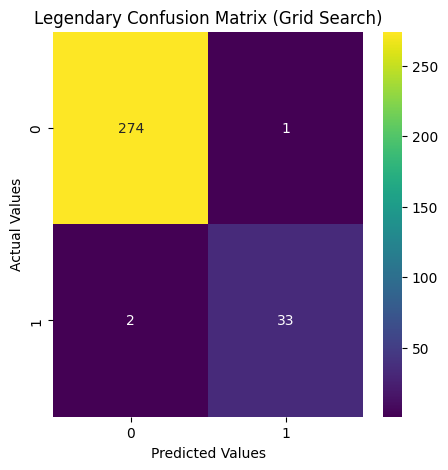

In [196]:
# Define the parameter grid
param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'bootstrap': [True, False]
}

# Create a RandomForestClassifier
rf = RandomForestClassifier(random_state=0)

# Create a GridSearchCV object
grid_search = GridSearchCV(estimator=rf, param_grid=param_grid, cv=5, n_jobs=-1, verbose=2)

# Fit the GridSearchCV object to the data
grid_search.fit(X_train, y_train)

# Print the best parameters found by GridSearchCV
print("Best parameters found: ", grid_search.best_params_)

# Make predictions using the best estimator
y_pred_gs = grid_search.predict(X_test)

# Print the classification report
print(classification_report(y_test, y_pred_gs))

# Plot the confusion matrix
cm_gs = confusion_matrix(y_test, y_pred_gs)
fig, ax = plt.subplots(figsize=(5, 5))
sns.heatmap(cm_gs, annot=True, cmap='viridis', fmt='g')
ax.set_ylabel('Actual Values')
ax.set_xlabel('Predicted Values')
ax.set_title('Legendary Confusion Matrix (Grid Search)')
plt.show()
plt.close()

The results post-GridSearchCV have improved my diabolical plot with an overall accuracy of 99%.  For legendary Pokémon (1.0), the precision has slightly dropped to 97%, but the recall has impressively climbed to 94%. This indicates that our fine-tuned model is now catching almost all the legendary Pokémon, leaving fewer to evade our grasp.

The macro and weighted averages further illustrate the enhancements achieved through GridSearchCV, showcasing a more balanced and robust model. With these improvements, my RandomForestClassifier is now a near-unstoppable force, bringing me one step closer to complete Pokémon world domination!